# REDES SOCIALES.
- [YouTube](https://www.youtube.com/@mi_sus)
- [LinkedIn](https://www.linkedin.com/in/misuspy)
- [GitHub](https://github.com/MitchelGsus)

# PROBLEMÁTICA.
### La Universidad Nacional De Ingeniería desea comprender más la demografia de sus estudiantes. Con el objetivo de saber:
- ¿Cuáles Son Las 10 Especialidades Con La Mayor Cantidad De Estudiantes Matriculados? ✓
- ¿Cuál es La Carrera Más Predominante De Los Estudiantes Matriculados Según Su Sexo? ✓
- ¿Cuántos Estudiantes Se Matricularon En Total Cada Año? ✓
- ¿Cuál es La Carrera Más Predominante De Los Estudiantes Matriculados Por Año y Especialidad? ✓
- ¿Cuál Fue La Distribución De La Matrícula De Estudiantes Por Género A Lo Largo De Los Años? ✓
- ¿Cuál Es La Proporción De Estudiantes Hombres Y Mujeres Matriculados? ✓
- ¿Cuál Es La Nacionalidad Predominante De Los Estudiantes Matriculados? ✓
- ¿Cuál Es La Edad Predominante De Los Estudiantes Matriculados? ✓

# 1. PREPARACIÓN Y CARGA DE DATOS.

### 1.1 IMPORTAMOS LIBRERIAS.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
#pd.set_option('display.max_columns', 2)
#pd.reset_option('display.max_columns')

### 1.2 CARGAMOS LOS DATOS.

In [2]:
data = '../data/Matriculados_2016_al_2022.csv'
df = pd.read_csv(data)

In [3]:
df.head()

,Código,Año Matrícula,Período,Tipo de hecho,Género,Nacionalidad,Año Nacimiento,Departamento Colegio,Distrito Residencia,Provincia Residencia,Departamento Residencia,Modalidad,Metodologia,Facultad,Especialidad,Ciclo Relativo
0,eb983f187c0f481be4aa97cbd3ce66139ff370a39bdbcf...,2016,1,REGULARES,MASCULINO,Peru,1967,LIMA,EL AGUSTINO,LIMA,LIMA,Pregrado,Presencial,"ARQUITECTURA, URBANISMO Y ARTES",ARQUITECTURA,10
1,000e2d0dcb4eaf37bb6851c82364f8fbff13edccac92c9...,2016,1,REGULARES,MASCULINO,Peru,1955,LIMA,CHACLACAYO,LIMA,LIMA,Pregrado,Presencial,INGENIERÍA ELÉCTRICA Y ELECTRÓNICA,INGENIERÍA ELÉCTRICA,9
2,fe34019137bdfad9083af4f91290e7bb1ed181006eedd7...,2016,1,REGULARES,MASCULINO,Peru,1970,LIMA,INDEPENDENCIA,LIMA,LIMA,Pregrado,Presencial,"INGENIERÍA ECONÓMICA, ESTADÍSTICA Y CIENCIAS S...",INGENIERÍA ECONÓMICA,2
3,133807cb215cc40e95f7ad419f8d4e0e15d5d631d9336e...,2016,1,REGULARES,MASCULINO,Peru,1971,LIMA,NaN,NaN,AMAZONAS,Pregrado,Presencial,INGENIERÍA ELÉCTRICA Y ELECTRÓNICA,INGENIERÍA ELECTRÓNICA,10
4,a0ae32c60ce68583f038569c807658c3a751c2a846dd17...,2016,1,REGULARES,MASCULINO,Peru,1957,LIMA,NaN,NaN,AMAZONAS,Pregrado,Presencial,INGENIERÍA ELÉCTRICA Y ELECTRÓNICA,INGENIERÍA ELECTRÓNICA,2


# 2. EXPLORACIÓN INICIAL.

### 2.1 Analizando Variables Del Dataset

In [4]:
# Vemos los tipos de variables del dataframe a demás de las columnas, ya no es necesario poner df.columns.
df.dtypes

Código                     object
Año Matrícula               int64
Período                     int64
Tipo de hecho              object
Género                     object
Nacionalidad               object
Año Nacimiento              int64
Departamento Colegio       object
Distrito Residencia        object
Provincia Residencia       object
Departamento Residencia    object
Modalidad                  object
Metodologia                object
Facultad                   object
Especialidad               object
Ciclo Relativo              int64
dtype: object

In [5]:
# Este código ejecuta el tamaño del dataframe, hay 163199 filas y 16 columnas.
df.shape

(163199, 16)

# 3. Data Cleaning.

In [6]:
# Creamos una copia para que el dataframe original no se vea afectado a los análisis posteriores.
df2 = df.copy()

In [7]:
# Seleccionamos solo las columnas que necesitamos.
# df = df.drop(['Código', 'Distrito Residencia', 'Departamento Residencia'], axis= 1)
df2 = df2[[#'Código', 
    'Año Matrícula', 'Período', 'Tipo de hecho', 'Género',
       'Nacionalidad', 'Año Nacimiento', 
       #'Departamento Colegio',
       #'Distrito Residencia',
       #'Provincia Residencia',
       'Departamento Residencia',
       'Modalidad', 'Metodologia', 'Facultad',
       'Especialidad', 'Ciclo Relativo']]

In [8]:
# Verificamos si el código se ejecutó correctamente.
print(df2.columns)
print(df2.shape)

Index(['Año Matrícula', 'Período', 'Tipo de hecho', 'Género', 'Nacionalidad',
       'Año Nacimiento', 'Departamento Residencia', 'Modalidad', 'Metodologia',
       'Facultad', 'Especialidad', 'Ciclo Relativo'],
      dtype='object')
(163199, 12)


### 3.1 Renombrando Columnas

In [9]:
df2.columns

Index(['Año Matrícula', 'Período', 'Tipo de hecho', 'Género', 'Nacionalidad',
       'Año Nacimiento', 'Departamento Residencia', 'Modalidad', 'Metodologia',
       'Facultad', 'Especialidad', 'Ciclo Relativo'],
      dtype='object')

In [10]:
# df2 = df2.rename(columns={df.columns[0]: 'New_Column_Name'})
df2 = df2.rename(columns = {'Año Matrícula': 'Año_Matricula', 'Período': 'Periodo', 'Tipo de hecho': 'Tipo_Hecho', 'Género' : 'Genero',
       'Año Nacimiento': 'Año_Nacimiento',
       'Provincia Residencia': 'Provincia_Residencia', 'Departamento Residencia': 'Departamento_Residencia', 'Ciclo Relativo': 'Ciclo_Relativo'})

In [11]:
# Verificamos que el cambio de nombre se aplicó correctamente.
df2.columns

Index(['Año_Matricula', 'Periodo', 'Tipo_Hecho', 'Genero', 'Nacionalidad',
       'Año_Nacimiento', 'Departamento_Residencia', 'Modalidad', 'Metodologia',
       'Facultad', 'Especialidad', 'Ciclo_Relativo'],
      dtype='object')

### 3.2 CONTAR NULOS.

In [12]:
df2['Año_Nacimiento'].unique()

array([1967, 1955, 1970, 1971, 1957, 1961, 1965, 1976, 1978, 1982, 1981,
       1979, 1984, 1983, 1987, 1985, 1986, 1991, 1989, 1990, 1988, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 1975, 1973, 1977, 1972,
       1960,    0, 1980, 1959, 1969, 1974, 1966, 1956, 1964, 1954, 1968,
       1962, 1952, 1949, 1944, 1958, 2000, 1951, 1963, 1953, 1950, 1938,
       1941, 1947, 2001, 2002, 2003, 2004, 2005, 1943, 2006], dtype=int64)

In [13]:
# Este bucle for lo hice para ver los valores únicos de todas las columnas.
for i in df2:
    print(i,'\n', df2[i].unique())

Año_Matricula 
 [2016 2017 2018 2019 2020 2021 2022]
Periodo 
 [1 2]
Tipo_Hecho 
 ['REGULARES' 'PROMOCION' 'REINCORPORADOS' 'CACHIMBOS' 'CODIGO ANTIGUO'
 'RIESGO ACADEMICO' 'REINCORPORADOS TRIKAS' 'GRUPO ESPECIAL'
 'SEGUNDA PROFESION' 'TRASLADO EXTERNO' 'TRASLADO INTERNO' 'GRUPO CERO'
 'REZAGADOS' 'REINCORPORADOS RIESGO ACADEMICO']
Genero 
 ['MASCULINO' 'FEMENINO' nan]
Nacionalidad 
 ['Peru' 'Venezuela' 'Bolivia' nan 'Colombia' 'Japon' 'Chile' 'Argentina'
 'China' 'Estados Unidos' 'Guatemala' 'Brasil' 'rusia' 'RSS de Ucrania'
 'Nueva Zelandia' 'Mexico' 'Alemania' 'Francia' 'Italia' 'Paraguay'
 'España' 'Corea Republica' 'Suiza']
Año_Nacimiento 
 [1967 1955 1970 1971 1957 1961 1965 1976 1978 1982 1981 1979 1984 1983
 1987 1985 1986 1991 1989 1990 1988 1992 1993 1994 1995 1996 1997 1998
 1999 1975 1973 1977 1972 1960    0 1980 1959 1969 1974 1966 1956 1964
 1954 1968 1962 1952 1949 1944 1958 2000 1951 1963 1953 1950 1938 1941
 1947 2001 2002 2003 2004 2005 1943 2006]
Departamento_Residen

In [14]:
# Contamos los valores no nulos(NaN)
df2.count()

Año_Matricula              163199
Periodo                    163199
Tipo_Hecho                 163199
Genero                     162931
Nacionalidad               160864
Año_Nacimiento             163199
Departamento_Residencia    155811
Modalidad                  163199
Metodologia                163199
Facultad                   163199
Especialidad               163199
Ciclo_Relativo             163199
dtype: int64

In [15]:
# Contamos los valores nulos(NaN)
# df2.shape[0]-df2.count() es lo mismo
df2.isna().sum()

Año_Matricula                 0
Periodo                       0
Tipo_Hecho                    0
Genero                      268
Nacionalidad               2335
Año_Nacimiento                0
Departamento_Residencia    7388
Modalidad                     0
Metodologia                   0
Facultad                      0
Especialidad                  0
Ciclo_Relativo                0
dtype: int64

In [16]:
# Contamos cuantos valores 0 hay y lo sumamos, ya que da resultados booleanos.
(df2[df2.columns] == 0).sum()

Año_Matricula                0
Periodo                      0
Tipo_Hecho                   0
Genero                       0
Nacionalidad                 0
Año_Nacimiento             385
Departamento_Residencia      0
Modalidad                    0
Metodologia                  0
Facultad                     0
Especialidad                 0
Ciclo_Relativo               0
dtype: int64

In [17]:
# Le decimos que sume los datos de todas las columnas que sean nulos e igual a 0.
df2[df2.columns].isnull().sum() + (df2[df2.columns] == 0).sum() 

Año_Matricula                 0
Periodo                       0
Tipo_Hecho                    0
Genero                      268
Nacionalidad               2335
Año_Nacimiento              385
Departamento_Residencia    7388
Modalidad                     0
Metodologia                   0
Facultad                      0
Especialidad                  0
Ciclo_Relativo                0
dtype: int64

### 3.3 Cambiar los datos 0 a nulos.

In [18]:
for column in df2.columns:
    if 0 in df2[column].values:
        print(f'La columna {column} contiene 0')

La columna Año_Nacimiento contiene 0


In [19]:
# Remplacé con NaN los valores que tenían 0, en la columna 'Año_Nacimiento'
df2['Año_Nacimiento'] = df2['Año_Nacimiento'].replace(0, np.nan)

In [20]:
# Comprueba si el código anterior se ejecutó correctamente y verifico si la columna 'Año_Nacimiento' contiene 0 y si es así que los sume.
(df2['Año_Nacimiento']==0).sum()

0

### Ahora todas los datos que tenían 0 son NaN o sea nulos, por consiguiente podremos hacer la imputación de datos.

#  4. Imputación De Datos

In [21]:
# Obtiene las columnas numéricas y aplica la imputación de valores faltantes, mediante el promedio de la columna.
col_num =df2.select_dtypes(include=['int64', 'float64']).columns
df2[col_num] = df2[col_num].fillna(df2[col_num].mean()).astype('int64')

In [22]:
df2['Año_Nacimiento'].unique()

array([1967, 1955, 1970, 1971, 1957, 1961, 1965, 1976, 1978, 1982, 1981,
       1979, 1984, 1983, 1987, 1985, 1986, 1991, 1989, 1990, 1988, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 1975, 1973, 1977, 1972,
       1960, 1980, 1959, 1969, 1974, 1966, 1956, 1964, 1954, 1968, 1962,
       1952, 1949, 1944, 1958, 2000, 1951, 1963, 1953, 1950, 1938, 1941,
       1947, 2001, 2002, 2003, 2004, 2005, 1943, 2006], dtype=int64)

In [23]:
# Imputación correcta
df2.isna().sum()

Año_Matricula                 0
Periodo                       0
Tipo_Hecho                    0
Genero                      268
Nacionalidad               2335
Año_Nacimiento                0
Departamento_Residencia    7388
Modalidad                     0
Metodologia                   0
Facultad                      0
Especialidad                  0
Ciclo_Relativo                0
dtype: int64

In [24]:
# Obtiene las columnas object y aplica la imputación de valores faltantes
col_obj = df2.select_dtypes(include='object').columns
df2[col_obj] = df2[col_obj].fillna(df2[col_obj].mode().iloc[0])

In [25]:
df2.isna().sum()

Año_Matricula              0
Periodo                    0
Tipo_Hecho                 0
Genero                     0
Nacionalidad               0
Año_Nacimiento             0
Departamento_Residencia    0
Modalidad                  0
Metodologia                0
Facultad                   0
Especialidad               0
Ciclo_Relativo             0
dtype: int64

In [26]:
df2.isna().sum()

Año_Matricula              0
Periodo                    0
Tipo_Hecho                 0
Genero                     0
Nacionalidad               0
Año_Nacimiento             0
Departamento_Residencia    0
Modalidad                  0
Metodologia                0
Facultad                   0
Especialidad               0
Ciclo_Relativo             0
dtype: int64

# 5. Creando columna edad.

In [27]:
df2.columns

Index(['Año_Matricula', 'Periodo', 'Tipo_Hecho', 'Genero', 'Nacionalidad',
       'Año_Nacimiento', 'Departamento_Residencia', 'Modalidad', 'Metodologia',
       'Facultad', 'Especialidad', 'Ciclo_Relativo'],
      dtype='object')

In [28]:
#df2['Edad'] = df2['Año_Matricula'] - df2['Año_Nacimiento']

In [29]:
# Conocer el N° orden de la columna 'Año_Nacimiento'
df2.columns.get_loc('Año_Nacimiento')

5

In [30]:
#Este código basicamente, le dice que inserte una nueva  columna con nombre 'Edad' en la columna numero 5+1 que sería la 6, por eso se usó get_loc.
#Por último le indicamos con que datos queremos rellenar las filas.
df2.insert(df2.columns.get_loc('Año_Nacimiento')+1,'Edad', df2['Año_Matricula'] - df2['Año_Nacimiento'])

In [31]:
print(f"la persona con menor edad que ingresó fue de {df2['Edad'].min()} años".title())
print(f"la persona con mayor edad que ingresó fue de {df2['Edad'].max()} años".title())

La Persona Con Menor Edad Que Ingresó Fue De 15 Años
La Persona Con Mayor Edad Que Ingresó Fue De 79 Años


# 6. VISUALIZACIÓN DE DATOS

### 6.1 PREGUNTA 1.

> **¿Cuáles Son Las 10 Especialidades Con La Mayor Cantidad De Estudiantes Matriculados?**

In [32]:
especialidades_count = df2['Especialidad'].value_counts()
especialidades_count

Especialidad
INGENIERÍA CIVIL                                21084
ARQUITECTURA                                    11897
INGENIERÍA DE SISTEMAS                          10692
INGENIERÍA INDUSTRIAL                           10013
INGENIERÍA QUÍMICA                               8902
INGENIERÍA ECONÓMICA                             8528
INGENIERÍA ELÉCTRICA                             7185
INGENIERÍA ELECTRÓNICA                           7135
INGENIERÍA MECÁNICA                              7083
INGENIERÍA MECÁNICA Y ELÉCTRICA                  6978
INGENIERÍA DE TELECOMUNICACIONES                 6454
INGENIERÍA MECATRÓNICA                           6320
INGENIERÍA DE MINAS                              5184
INGENIERÍA SANITARIA                             4487
INGENIERÍA GEOLÓGICA                             4200
INGENIERÍA AMBIENTAL                             3949
CIENCIA DE LA COMPUTACIÓN                        3915
INGENIERÍA ESTADÍSTICA                           3617
INGENIERÍA META

In [33]:
# Utilizando slicing[] or head()
df2_top_especialidad = df2['Especialidad'].value_counts().sort_values(ascending=False)[:10]
df2_top_especialidad

Especialidad
INGENIERÍA CIVIL                   21084
ARQUITECTURA                       11897
INGENIERÍA DE SISTEMAS             10692
INGENIERÍA INDUSTRIAL              10013
INGENIERÍA QUÍMICA                  8902
INGENIERÍA ECONÓMICA                8528
INGENIERÍA ELÉCTRICA                7185
INGENIERÍA ELECTRÓNICA              7135
INGENIERÍA MECÁNICA                 7083
INGENIERÍA MECÁNICA Y ELÉCTRICA     6978
Name: count, dtype: int64

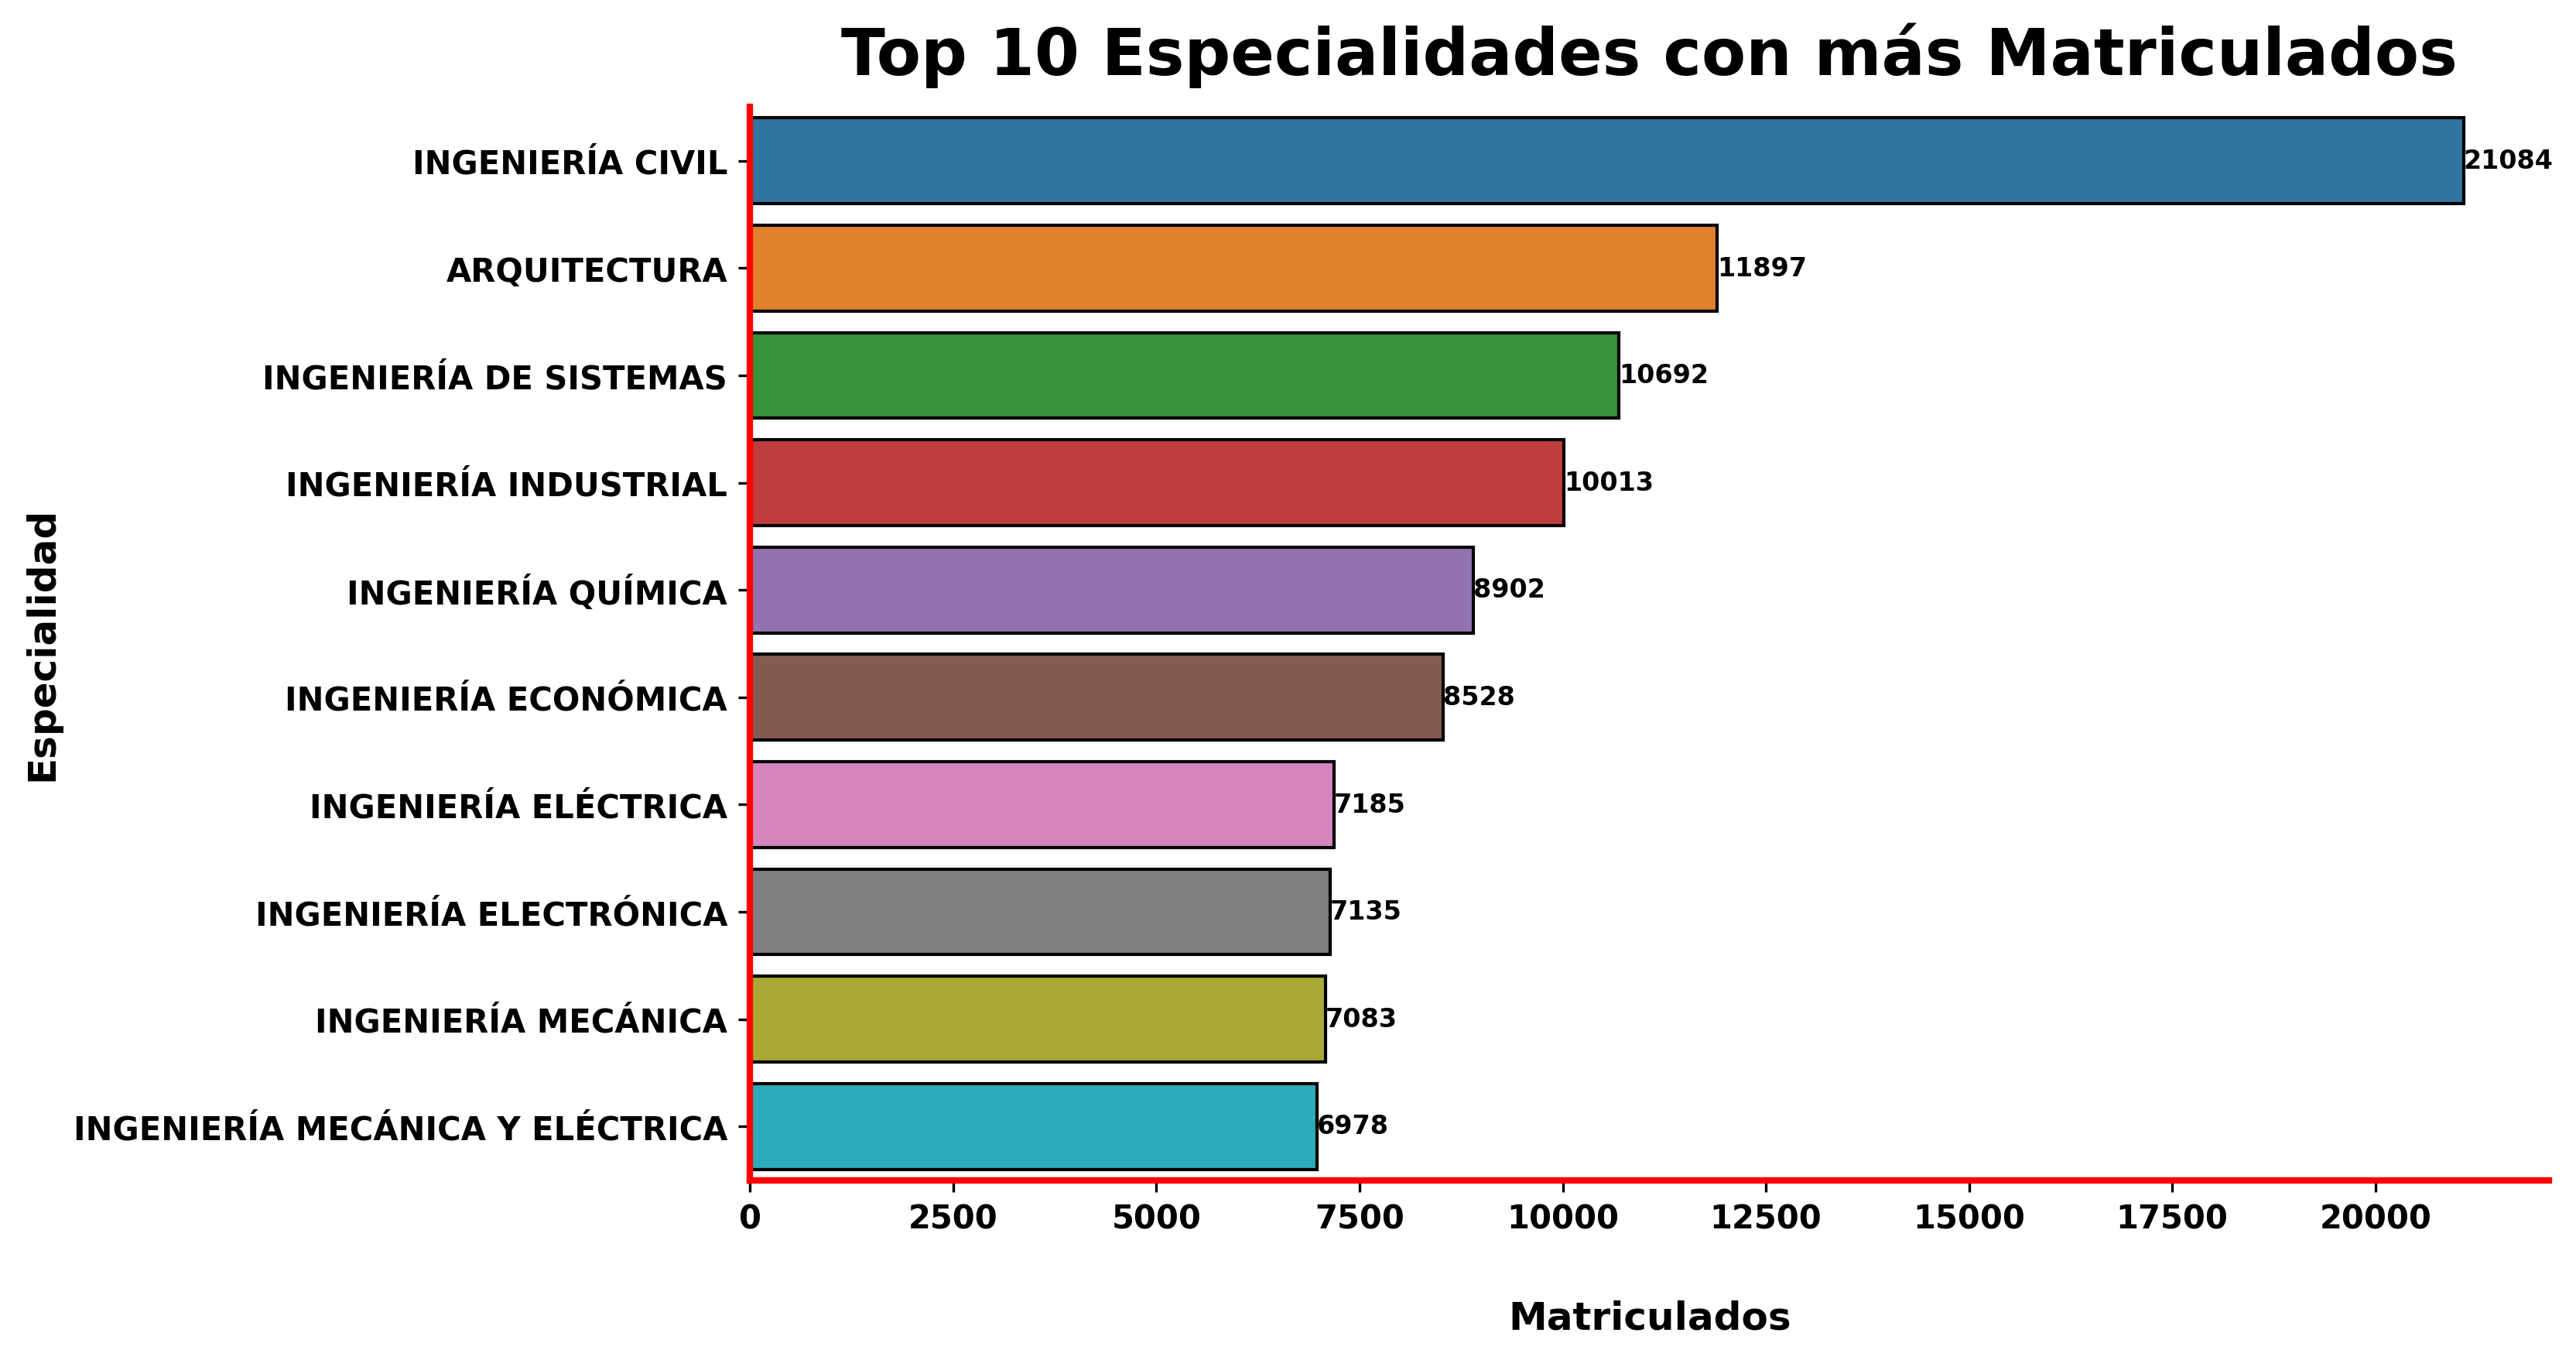

In [34]:
#Tamaño resolución del gráfico.
fig = plt.figure(figsize =(10, 6), dpi=300)
#Elección de gráfico
ax = sns.barplot(x=df2_top_especialidad.values, y=df2_top_especialidad.index, palette='tab10', edgecolor='black')
#Título del gráfico
plt.title('Top 10 Especialidades con más Matriculados', fontsize=20, pad=10, fontweight='bold')
#Valores de axis bold.
plt.ylabel('Especialidad', fontweight='bold', fontsize=12)
plt.xlabel('Matriculados', fontweight='bold', fontsize=12, labelpad=20)
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#Elimina las líneas del eje superior y derecho.
sns.despine(top=True)
#Se desactiva el grid del gráfico.
ax.grid(False)
#El bucle "for" recorre cada uno de los axis [...] y asigna color y grosor respectivo al gráfico.
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', fontweight='bold', fontsize=8)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('red')
#Guardar gráfico.
plt.savefig("../img/10_especialidades_mas_matriculados.jpg", dpi=300, bbox_inches='tight')
#Mostrar el gráfico.
plt.show()

In [35]:
# Conclusiones de las 10 especialidades con más matricualdos
print(f"• En nuestro DataSet se realizaron {df2['Especialidad'].count()} matriculas.")
print(f"• Existen {df2['Especialidad'].nunique()} especialidades diferentes.")
print(f"• {especialidades_count.index[0].title()} es la especialidad con más matriculados.")
print(f"• {especialidades_count.index[-1].title()} e {especialidades_count.index[-2].title()} son las dos especialidades con menos matriculados.")
print(f"• Del 2016 al 2022 hubo de {especialidades_count[0]} matriculados en la especialidaad {especialidades_count.index[0].title()}, representando el {especialidades_count[0]/df2['Especialidad'].count():.2%} de todas las matriculas totales.")

• En nuestro DataSet se realizaron 163199 matriculas.
• Existen 31 especialidades diferentes.
• Ingeniería Civil es la especialidad con más matriculados.
• Estadística e Ingeniería De Petróleo son las dos especialidades con menos matriculados.
• Del 2016 al 2022 hubo de 21084 matriculados en la especialidaad Ingeniería Civil, representando el 12.92% de todas las matriculas totales.


## Insights de las top 10 especialidades con más matriculados.
- En nuestro DataSet se realizaron 163199 matriculas.
- Existen 31 especialidades diferentes.
- Ingeniería Civil es la especialidad con más matriculados.
- Estadística e Ingeniería De Petróleo son las dos especialidades con menos matriculados.
- Del 2016 al 2022 hubo de 21084 matriculados en la especialidaad Ingeniería Civil, representando el 12.92% de todas las matriculas totales.

### 6.2 PREGUNTA 2.

> **¿Cuál es La Carrera Más Predominante De Los Estudiantes Matriculados Según Su Sexo?**

In [36]:
# df2[df2['Genero'] == 'MASCULINO'].groupby('Especialidad')['Especialidad'].count()
# df2[df2['Genero'] == 'FEMENINO'].groupby('Especialidad')['Especialidad'].count()
# (df2.groupby(['Especialidad', 'Genero'])[['Genero']].count().unstack())

In [37]:
# Unstack() Convierte el segundo indice 'Genero' en columna. En pocas palabras se convierte en una Pivot Table.
especialidades_count_genero = df2.groupby(['Especialidad', 'Genero'])['Especialidad'].count().unstack().sort_values(by=['MASCULINO'], ascending=False)
especialidades_count_genero

Genero,FEMENINO,MASCULINO
Especialidad,,
INGENIERÍA CIVIL,1863.0,19221.0
INGENIERÍA DE SISTEMAS,884.0,9808.0
INGENIERÍA INDUSTRIAL,1925.0,8088.0
ARQUITECTURA,4953.0,6944.0
INGENIERÍA MECÁNICA,189.0,6894.0
INGENIERÍA ELÉCTRICA,293.0,6892.0
INGENIERÍA MECÁNICA Y ELÉCTRICA,219.0,6759.0
INGENIERÍA ELECTRÓNICA,407.0,6728.0
INGENIERÍA QUÍMICA,2272.0,6630.0


In [38]:
#Cambié el orden para que se pueda apreciar mejor (?)
df2_top_especialidad_genero = especialidades_count_genero[:10]
df2_top_especialidad_genero

Genero,FEMENINO,MASCULINO
Especialidad,,
INGENIERÍA CIVIL,1863.0,19221.0
INGENIERÍA DE SISTEMAS,884.0,9808.0
INGENIERÍA INDUSTRIAL,1925.0,8088.0
ARQUITECTURA,4953.0,6944.0
INGENIERÍA MECÁNICA,189.0,6894.0
INGENIERÍA ELÉCTRICA,293.0,6892.0
INGENIERÍA MECÁNICA Y ELÉCTRICA,219.0,6759.0
INGENIERÍA ELECTRÓNICA,407.0,6728.0
INGENIERÍA QUÍMICA,2272.0,6630.0


In [39]:
# Cambié el orden para que se pueda apreciar mejor (?)
df2_top_especialidad_genero = df2_top_especialidad_genero[['MASCULINO', 'FEMENINO']]

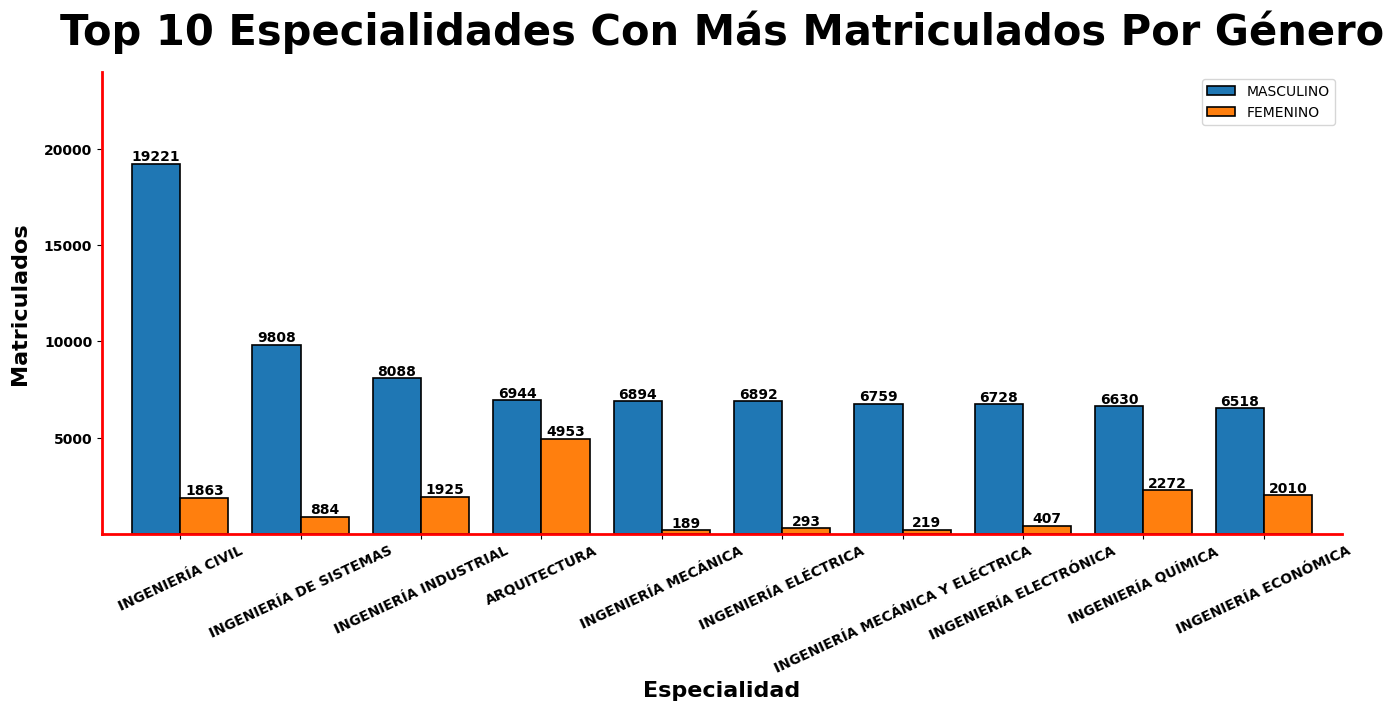

In [40]:
#Elección de gráfico.
ax = df2_top_especialidad_genero.plot(kind='bar', figsize=(16, 6), width=0.8, linewidth=1.2, edgecolor='black')
#Axis X.
ax.set_xlabel('Especialidad', fontsize=16, fontweight='bold')
#Axis Y.
ax.set_ylabel('Matriculados', fontsize=16, fontweight='bold', labelpad=10)
#Título.
ax.set_title('Top 10 Especialidades con más Matriculados Por Género'.title(), fontsize=30, fontweight='bold', pad=20)
#Límite axis Y.
plt.ylim(1,24000)
#Se desactiva el grid del gráfico.
ax.grid(False)
#Valores de axis bold.
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#Poner los valores en cada barplot.
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', fontweight='bold')
#El bucle "for" recorre cada uno de los axis [...] y asigna color y grosor respectivo al gráfico.
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('red')
#Elimina las líneas del eje superior y derecho.      
sns.despine(top=True)
#Rotación de las etiquetas, axis X.
#ax.margins(x=0.02)
plt.xticks(rotation=25)
#Agregar leyenda.
plt.legend(loc='best')
#Guardar gráfico.
plt.savefig("../img/10_especialidades_matriculados_genero.jpg", dpi=300, bbox_inches='tight')
#Mostrar el gráfico.
plt.show()

## Insights de las top 10 especialidades con más matriculados por genero.
- En todas las especialdades los hombres son los que tienen mayor porcentaje matriculados.
- En la carrera de Arquitectura las mujeres tuvieron más matriculados con respecto a las otras especialidades. Teniendo una participación del 41.63% con respecto al total.

### 6.3 PREGUNTA 3.


> **¿Cuántos Estudiantes Se Matricularon En Total Cada Año?**

In [41]:
matriculas_por_año = df2.groupby('Año_Matricula')['Año_Matricula'].count()

In [42]:
matriculas_por_año

Año_Matricula
2016    23204
2017    24152
2018    23243
2019    23958
2020    23617
2021    22634
2022    22391
Name: Año_Matricula, dtype: int64

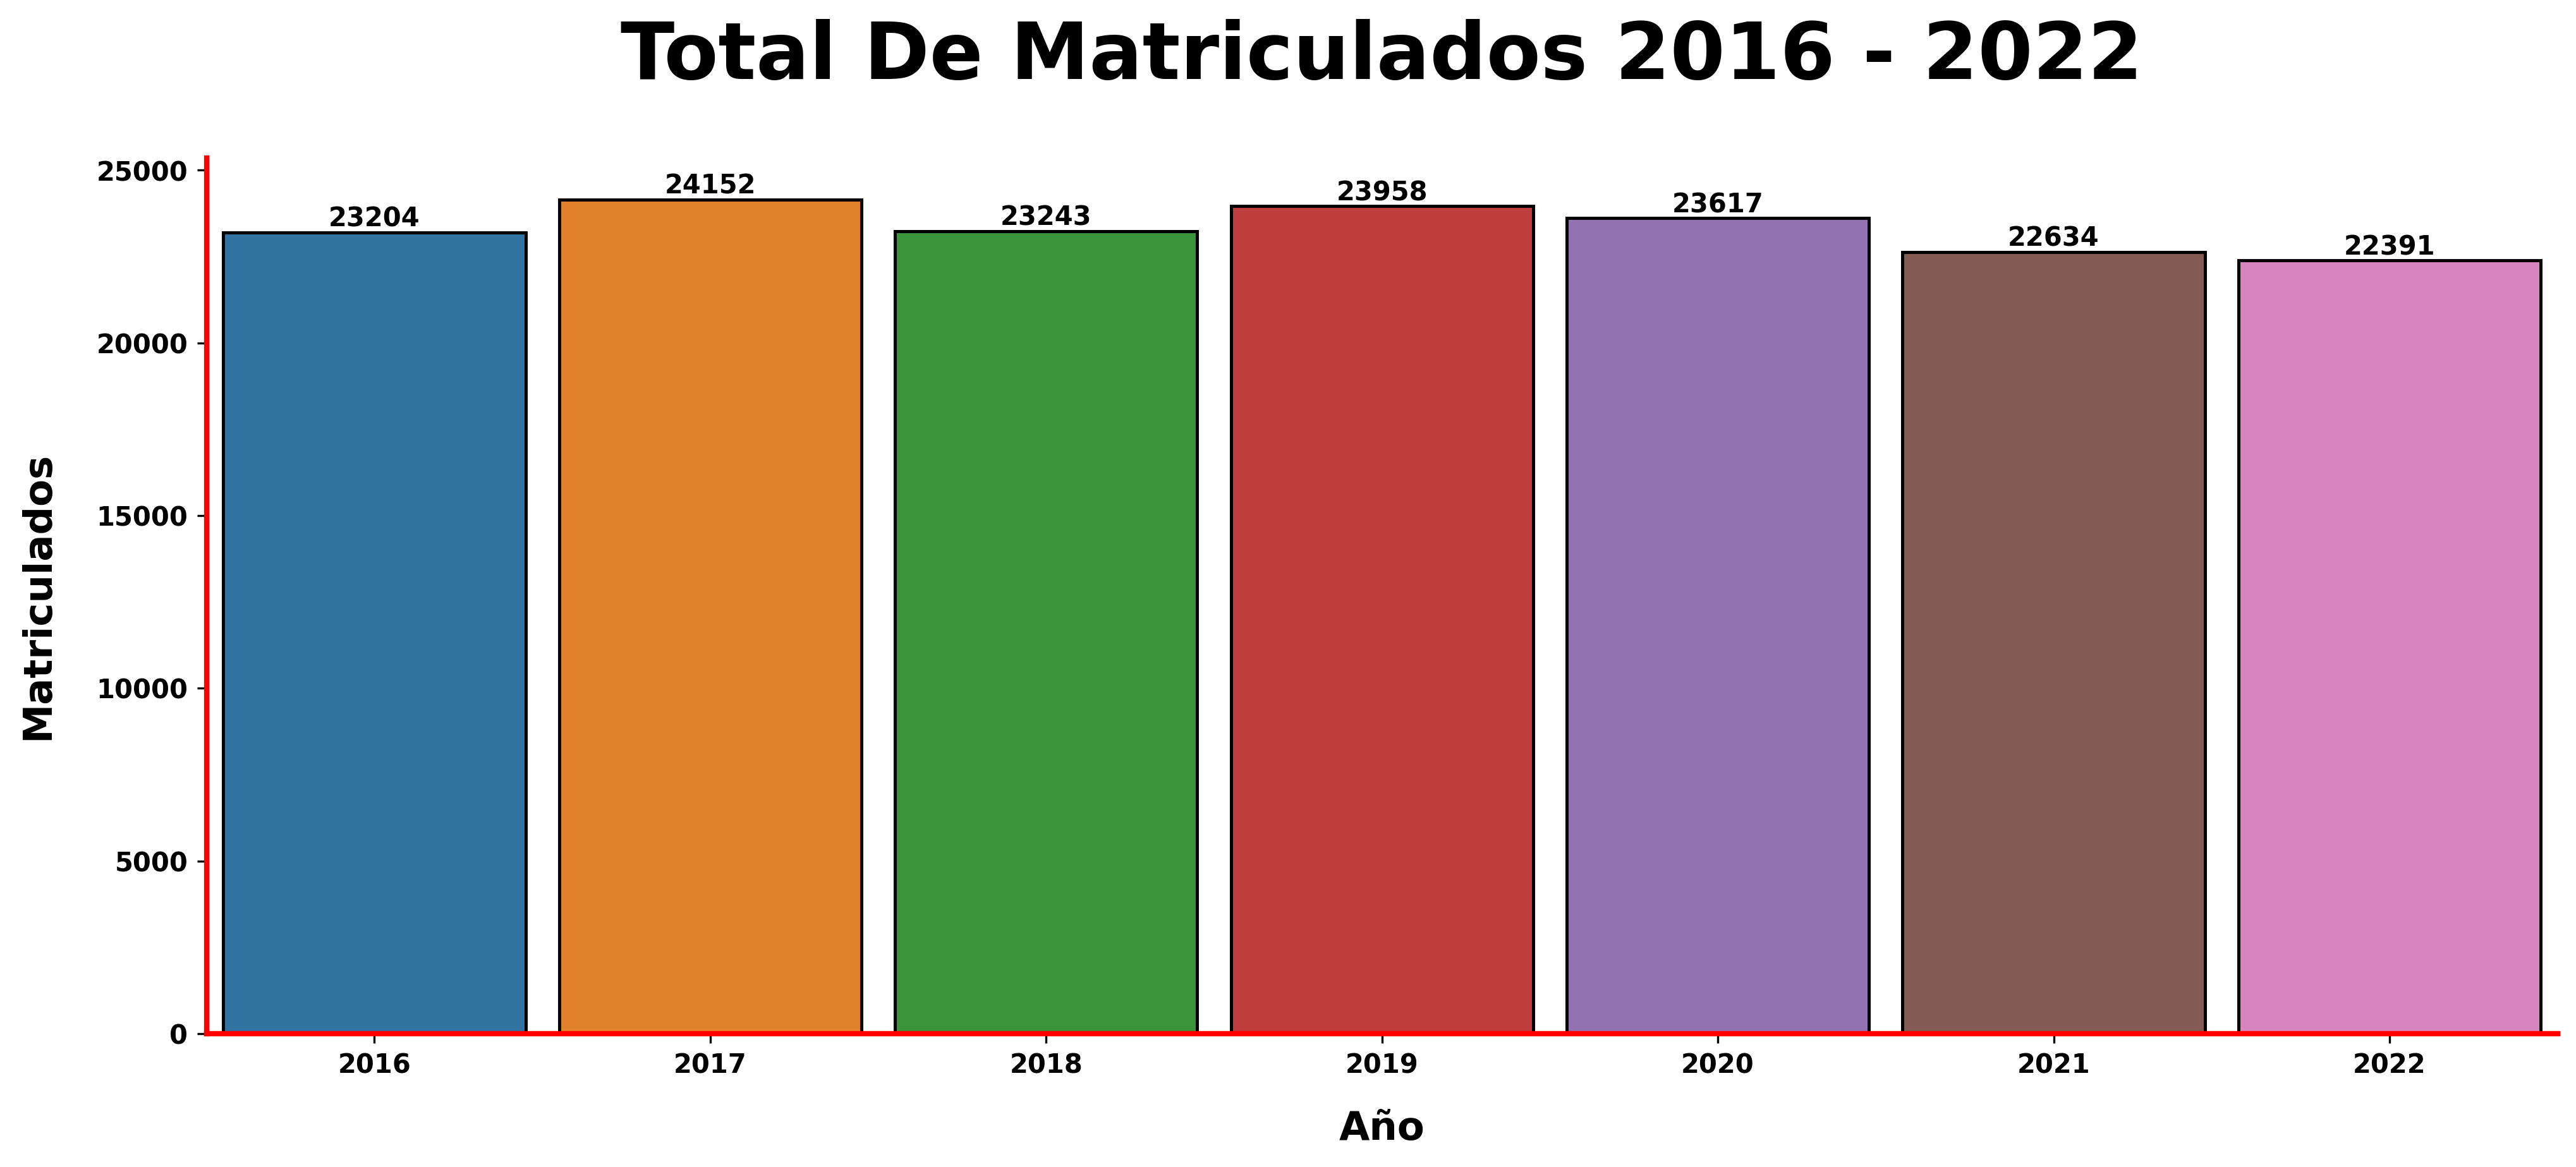

In [43]:
#Tamaño resolución del gráfico.
plt.figure(figsize=(16,6), dpi=300)
#Elección de gráfico.
ax = sns.barplot(x=matriculas_por_año.index,y=matriculas_por_año.values, edgecolor="black", width=0.9, linewidth=1.2)
#Título del gráfico.
plt.title("Total De Matriculados 2016 - 2022", fontsize=30, pad=30, fontweight='bold')
#Elimina las líneas del eje superior y derecho.
sns.despine(top=True)
#Se desactiva el grid del gráfico.
ax.grid(False)
#Poner los valores en cada barplot.
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', fontweight='bold')
#El bucle "for" recorre cada uno de los axis [...] y asigna color y grosor respectivo al gráfico.
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('red')
#Valores de axis bold.
plt.ylabel('Matriculados', fontweight='bold', fontsize= 15, labelpad=15)
plt.xlabel('Año', fontweight='bold', fontsize= 15, labelpad=12)
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#Guardar gráfico.
plt.savefig("../img/total_matriculados.jpg", dpi=300, bbox_inches='tight')
#Mostrar el gráfico.
plt.show()

In [44]:
print(f'• el año en que más alumnos se matricularon fue en el {matriculas_por_año.idxmax()}, con un total de {matriculas_por_año.max()} alumnos.'.title())
print(f'• el año en que menos alumnos se matricularon fue en el {matriculas_por_año.idxmin()}, con un total de {matriculas_por_año.min()} alumnos.'.title())
print(f'• Si bien cada año hubo un leve descenso en el número de matriculados, siempre se mantuvo por encima de 20000 matriculados por año.')

• El Año En Que Más Alumnos Se Matricularon Fue En El 2017, Con Un Total De 24152 Alumnos.
• El Año En Que Menos Alumnos Se Matricularon Fue En El 2022, Con Un Total De 22391 Alumnos.
• Si bien cada año hubo un leve descenso en el número de matriculados, siempre se mantuvo por encima de 20000 matriculados por año.


### 6.4 PREGUNTA 4.

> **¿Cuál es La Carrera Más Predominante De Los Estudiantes Matriculados Por Año y Especialidad?**

In [45]:
# df2[df2['Genero'] == 'MASCULINO'].groupby('Especialidad')['Especialidad'].count()
# df2[df2['Genero'] == 'FEMENINO'].groupby('Especialidad')['Especialidad'].count()
# (df2.groupby(['Especialidad', 'Genero'])[['Genero']].count().unstack())

In [46]:
matriculas_por_año_especialidad = df2.groupby(['Especialidad', 'Año_Matricula'])['Año_Matricula'].count().unstack()
matriculas_por_año_especialidad

Año_Matricula,2016,2017,2018,2019,2020,2021,2022
Especialidad,,,,,,,
ARQUITECTURA,1767.0,1855.0,1825.0,1743.0,1685.0,1500.0,1522.0
CIENCIA DE LA COMPUTACIÓN,447.0,480.0,498.0,579.0,602.0,644.0,665.0
ESTADÍSTICA,NaN,1.0,NaN,NaN,NaN,NaN,NaN
FÍSICA,337.0,365.0,389.0,425.0,467.0,483.0,520.0
INGENIERÍA AMBIENTAL,433.0,508.0,564.0,609.0,630.0,596.0,609.0
INGENIERÍA CIVIL,3175.0,3174.0,2928.0,3019.0,2965.0,2910.0,2913.0
INGENIERÍA DE HIGIENE Y SEGURIDAD INDUSTRIAL,450.0,470.0,463.0,464.0,488.0,480.0,407.0
INGENIERÍA DE MINAS,733.0,750.0,745.0,769.0,767.0,729.0,691.0
INGENIERÍA DE PETRÓLEO,1.0,NaN,NaN,NaN,NaN,NaN,NaN


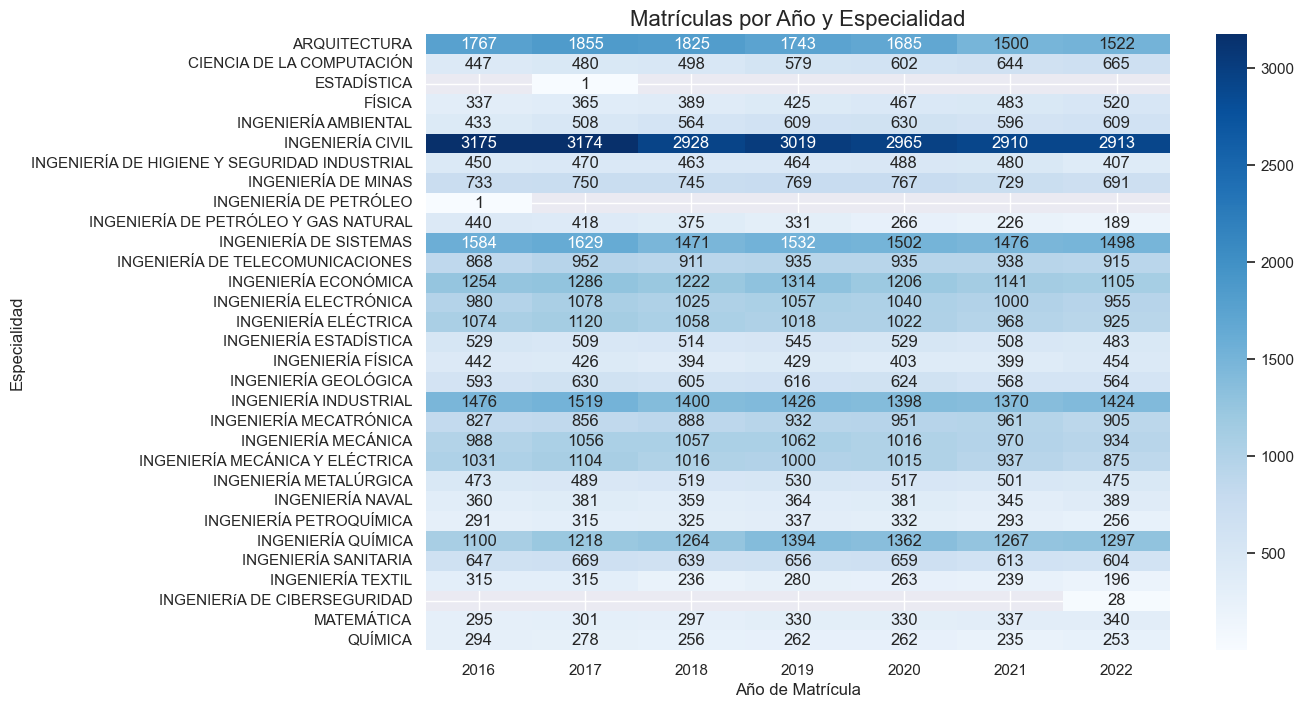

In [47]:
sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))
# Elegir gráfico.
sns.heatmap(matriculas_por_año_especialidad, annot=True, fmt='.0f', cmap='Blues')
# Configurar el título y los ejes
plt.title('Matrículas por Año y Especialidad', fontsize=16)
plt.xlabel('Año de Matrícula', fontsize=12)
plt.ylabel('Especialidad', fontsize=12)

# Mostrar el gráfico
plt.show()

- Como podemos observar, la especialidad de Ingeniería Civil siempre fue la que tuvo más personas inscritas durante los años del 2016 al 2022.
- Además podemos observar que el año 2016 fue el año en el que la especialidad de Ingeniería Civil alcanzó su pico máximo de matriculados, viendo una disminución leve en los años posteriores.
- La especialidad de Ingeniería De Petróleo solo tuvo un matriculado en el año 2016 siendo su único año en donde tuvo al menos un matriculado, pasando lo mismo con la especialidad de Estadística que solo tuvo un matriculado en el año 2017, cosa que es raro, ya que ambas especialidades son muy demandantes en el Perú. Posiblemente se trate de un error de omisión en los datos.

### 6.5 PREGUNTA 5.

> **¿Cuál Fue La Distribución De La Matrícula De Estudiantes Por Género A Lo Largo De Los Años?**

In [48]:
# Unstack() Convierte el segundo indice 'Genero' en columna. En pocas palabras se convierte en una Pivot Table.
matriculas_por_genero = df2.groupby(['Año_Matricula', 'Genero'])['Genero'].count().unstack()
matriculas_por_genero

Genero,FEMENINO,MASCULINO
Año_Matricula,,
2016,2976,20228
2017,3250,20902
2018,3401,19842
2019,3597,20361
2020,3628,19989
2021,3447,19187
2022,3566,18825


In [49]:
# Cambié el orden para que se pueda apreciar mejor (?)
matriculas_por_genero = matriculas_por_genero[['MASCULINO', 'FEMENINO']]
matriculas_por_genero

Genero,MASCULINO,FEMENINO
Año_Matricula,,
2016,20228,2976
2017,20902,3250
2018,19842,3401
2019,20361,3597
2020,19989,3628
2021,19187,3447
2022,18825,3566


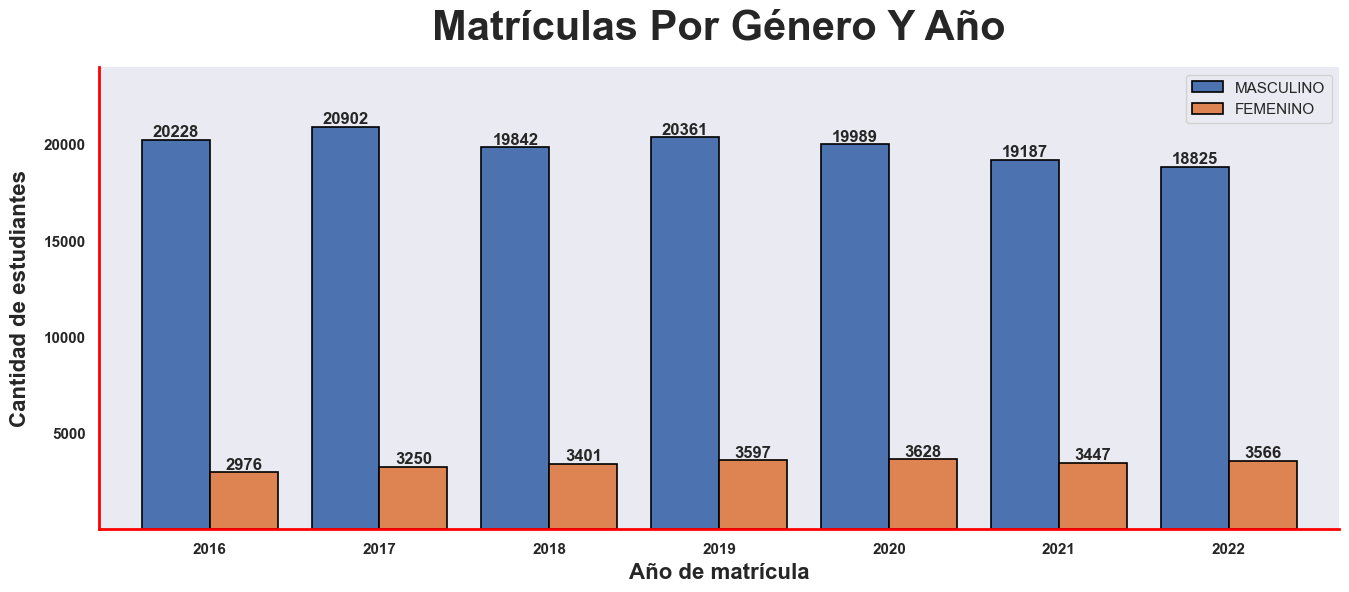

In [50]:
#Tamaño y resolución del gráfico.
#Elección de gráfico.
ax = matriculas_por_genero.plot(kind='bar', figsize=(16, 6), width=0.8, linewidth=1.2, edgecolor='black')
#Axis X.
ax.set_xlabel('Año de matrícula', fontsize=16, fontweight='bold')
#Axis Y.
ax.set_ylabel('Cantidad de estudiantes', fontsize=16, fontweight='bold', labelpad=10)
#Título.
ax.set_title('Matrículas por género y año'.title(), fontsize=30, fontweight='bold', pad=20)
#Límite axis Y.
plt.ylim(1,24000)
#Se desactiva el grid del gráfico.
ax.grid(False)
#Valores de axis bold.
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#Poner los valores en cada barplot.
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', fontweight='bold')
#El bucle "for" recorre cada uno de los axis [...] y asigna color y grosor respectivo al gráfico.
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('red')
#Elimina las líneas del eje superior y derecho.      
sns.despine(top=True)
#Rotación de las etiquetas, axis X.
plt.xticks(rotation=0)
#Agregar leyenda.
plt.legend(loc='best')
#Guardar gráfico.
plt.savefig("../img/matriculas_genero.jpg", dpi=300, bbox_inches='tight')
#Mostrar el gráfico.
plt.show()

In [51]:
# matriculas_por_genero.sum() | matriculas_por_genero.sum()[1]
print(f"Masculino: {matriculas_por_genero.sum()['MASCULINO']}")
print(f"Femenino: {matriculas_por_genero.sum()['FEMENINO']}")

Masculino: 139334
Femenino: 23865


In [52]:
count_genero = df2.groupby('Genero')['Genero'].count()
count_genero

Genero
FEMENINO      23865
MASCULINO    139334
Name: Genero, dtype: int64

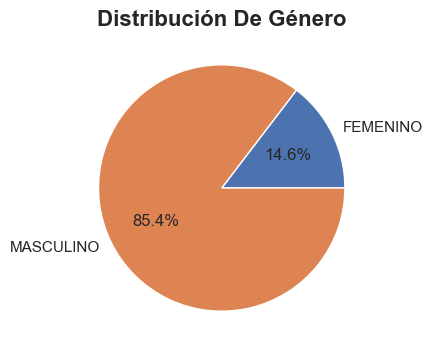

In [72]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(count_genero.values, labels=count_genero.index, autopct='%1.1f%%')
# Personalizar el gráfico
ax.set_title('Distribución De Género', fontsize=16, fontweight='bold')
#Guardar gráfico
plt.savefig("../img/distribucion_genero.jpg", dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

### Insgihts.
- Los varones tienen más matriculas al año que las mujeres.
- Del año 2016 al 2022 hubieron 23865 mujeres matriculadas.
- Del año 2016 al 2022 hubieron 139334 varones matriculados.
- Del 100% de los datos los varones abarcan el 85.4% y las mujeres solo el 14.6%.

### 6.6 PREGUNTA 6.

> **¿Cuál Es La Proporción De Estudiantes Hombres Y Mujeres Matriculados?**

In [54]:
formula = df2['Genero'].value_counts() / df2['Genero'].count()
formula
print(f'proporción de matriculados hombres: {formula[0]: .2%}'.title())
print(f'proporción de matriculados mujeres: {formula[1]: .2%}'.title())

Proporción De Matriculados Hombres:  85.38%
Proporción De Matriculados Mujeres:  14.62%


In [55]:
#Formula proporción  global.
proporcion = (df2.groupby(['Año_Matricula', 'Genero'])['Genero'].count() / df2['Genero'].count() * 100).unstack()
proporcion

Genero,FEMENINO,MASCULINO
Año_Matricula,,
2016,1.823541,12.394684
2017,1.991434,12.807677
2018,2.083959,12.158163
2019,2.204058,12.476179
2020,2.223053,12.248237
2021,2.112145,11.756812
2022,2.185062,11.534997


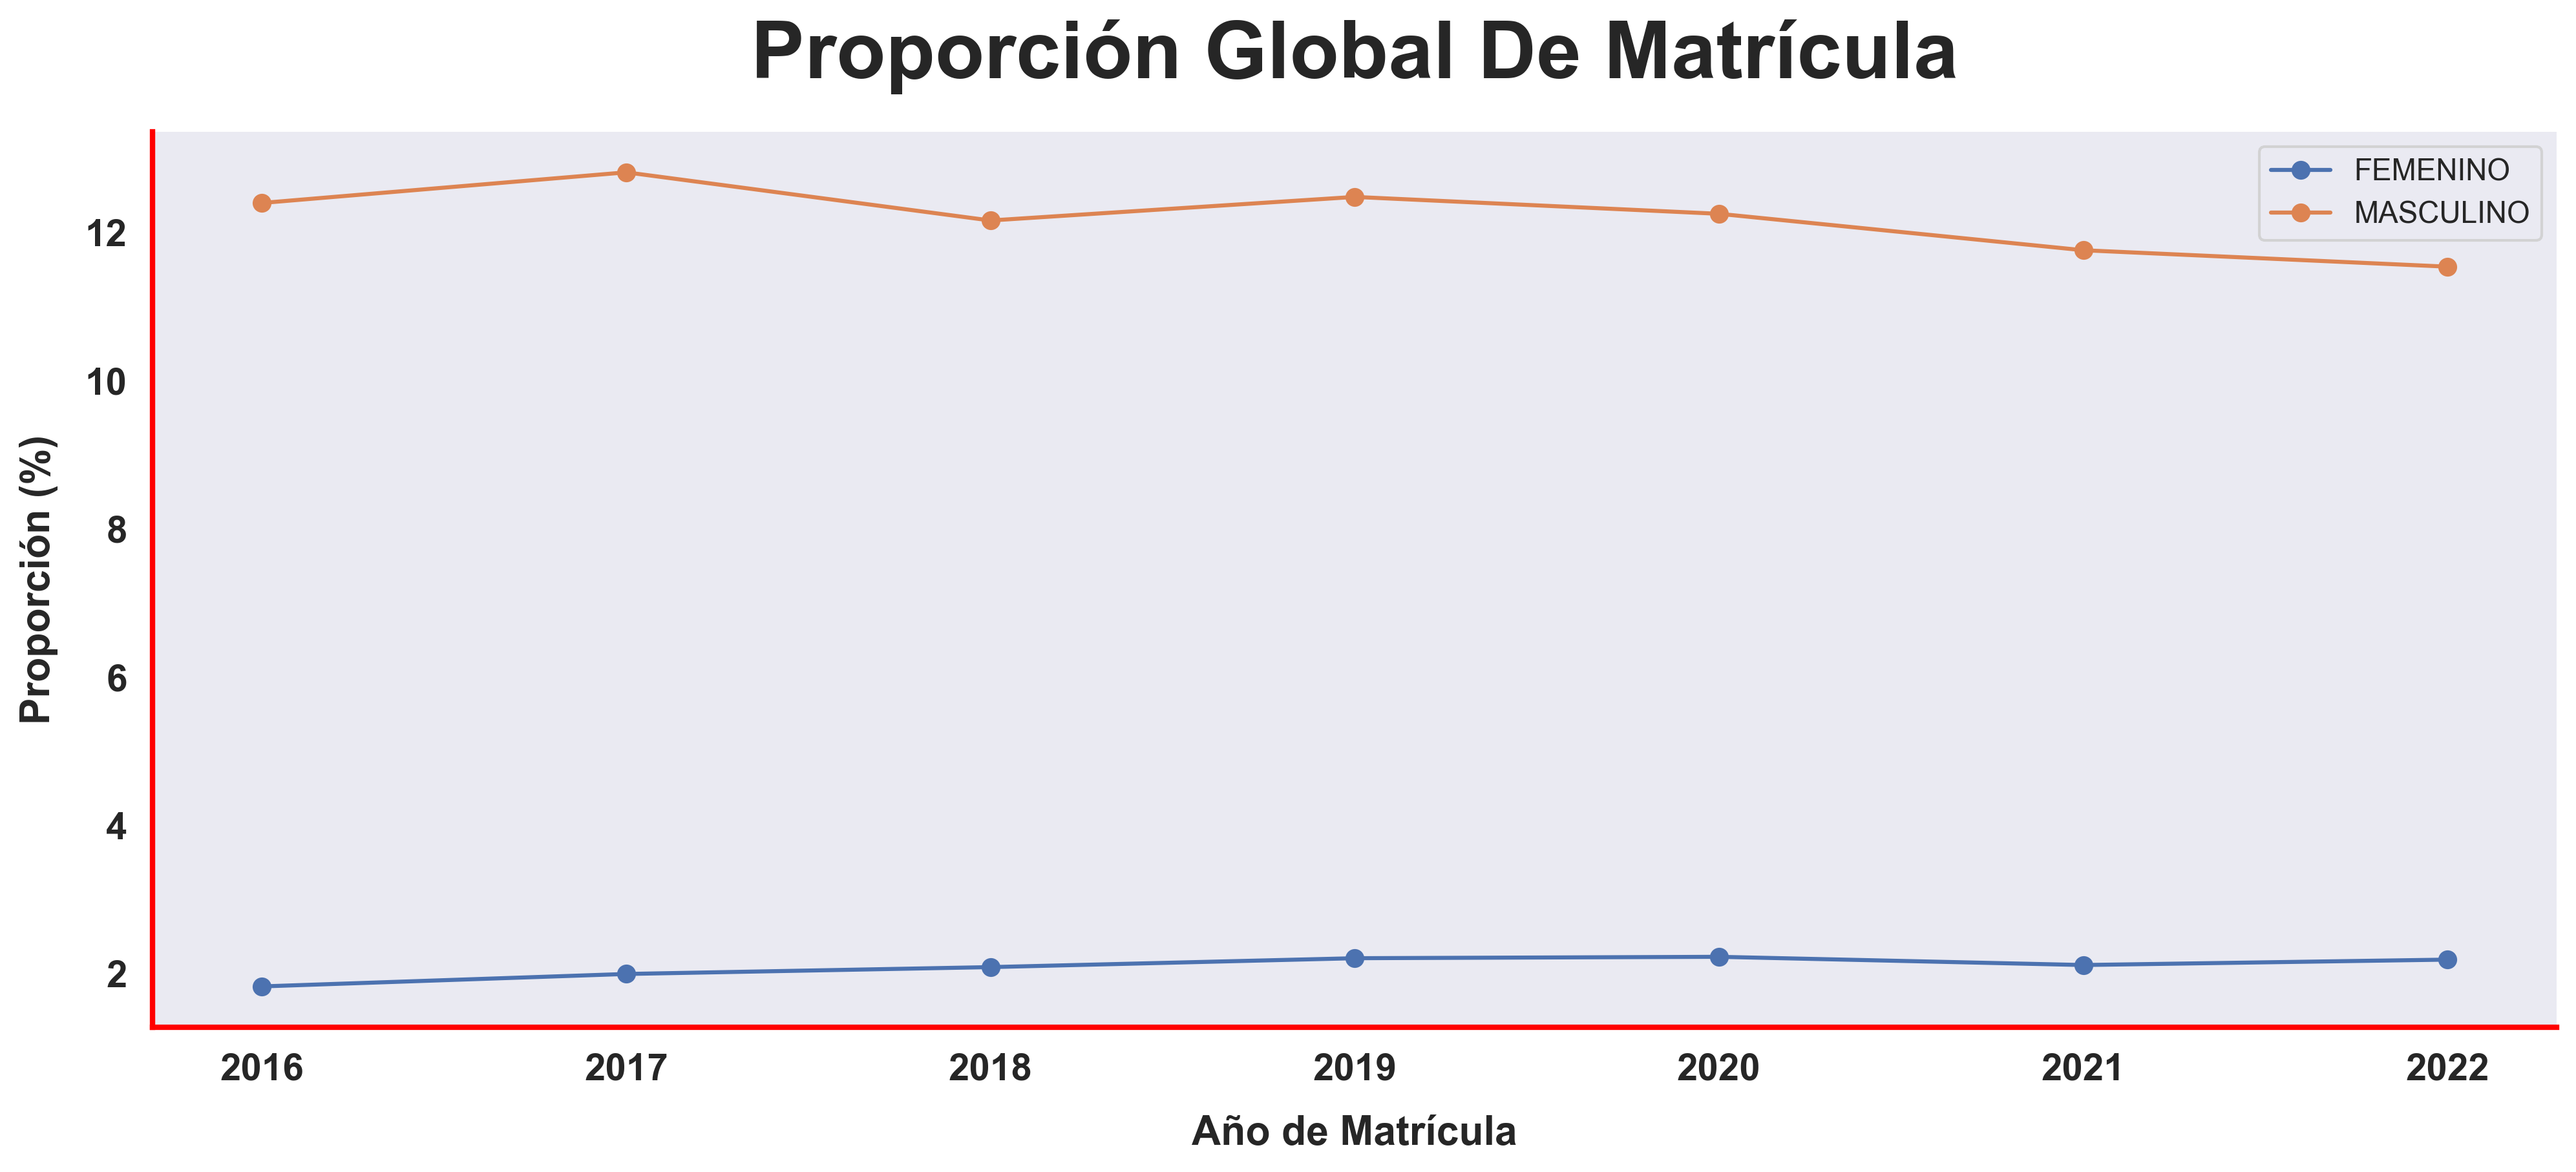

In [56]:
fig, ax = plt.subplots(figsize=(16,6), dpi=300)
proporcion.plot(kind='line', ax=ax, marker = 'o')
#
ax.grid(False)
#
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('red')
#
sns.despine(top=True)
#
plt.yticks(fontweight='bold', fontsize= 14)
plt.xticks(fontweight='bold', fontsize= 14)
# Configurar etiquetas y leyendas
plt.xlabel('Año de Matrícula', fontweight='bold', fontsize= 15, labelpad=10)
plt.ylabel('Proporción (%)', fontweight='bold', fontsize= 15, labelpad=10)
plt.title('Proporción global de Matrícula'.title(), fontsize=30, fontweight='bold', pad=20)
plt.legend(title='Género')
#
plt.legend(loc= 'best')
#Guardar gráfico.
plt.savefig("../img/proporcion_global_matricula.jpg", dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

In [57]:
#Formula proporción por año.
proporcion2 = round(df2.groupby(['Año_Matricula', 'Genero']).size().unstack().apply(lambda x: x / x.sum(), axis=1).mul(100), 2)
proporcion2

Genero,FEMENINO,MASCULINO
Año_Matricula,,
2016,12.83,87.17
2017,13.46,86.54
2018,14.63,85.37
2019,15.01,84.99
2020,15.36,84.64
2021,15.23,84.77
2022,15.93,84.07


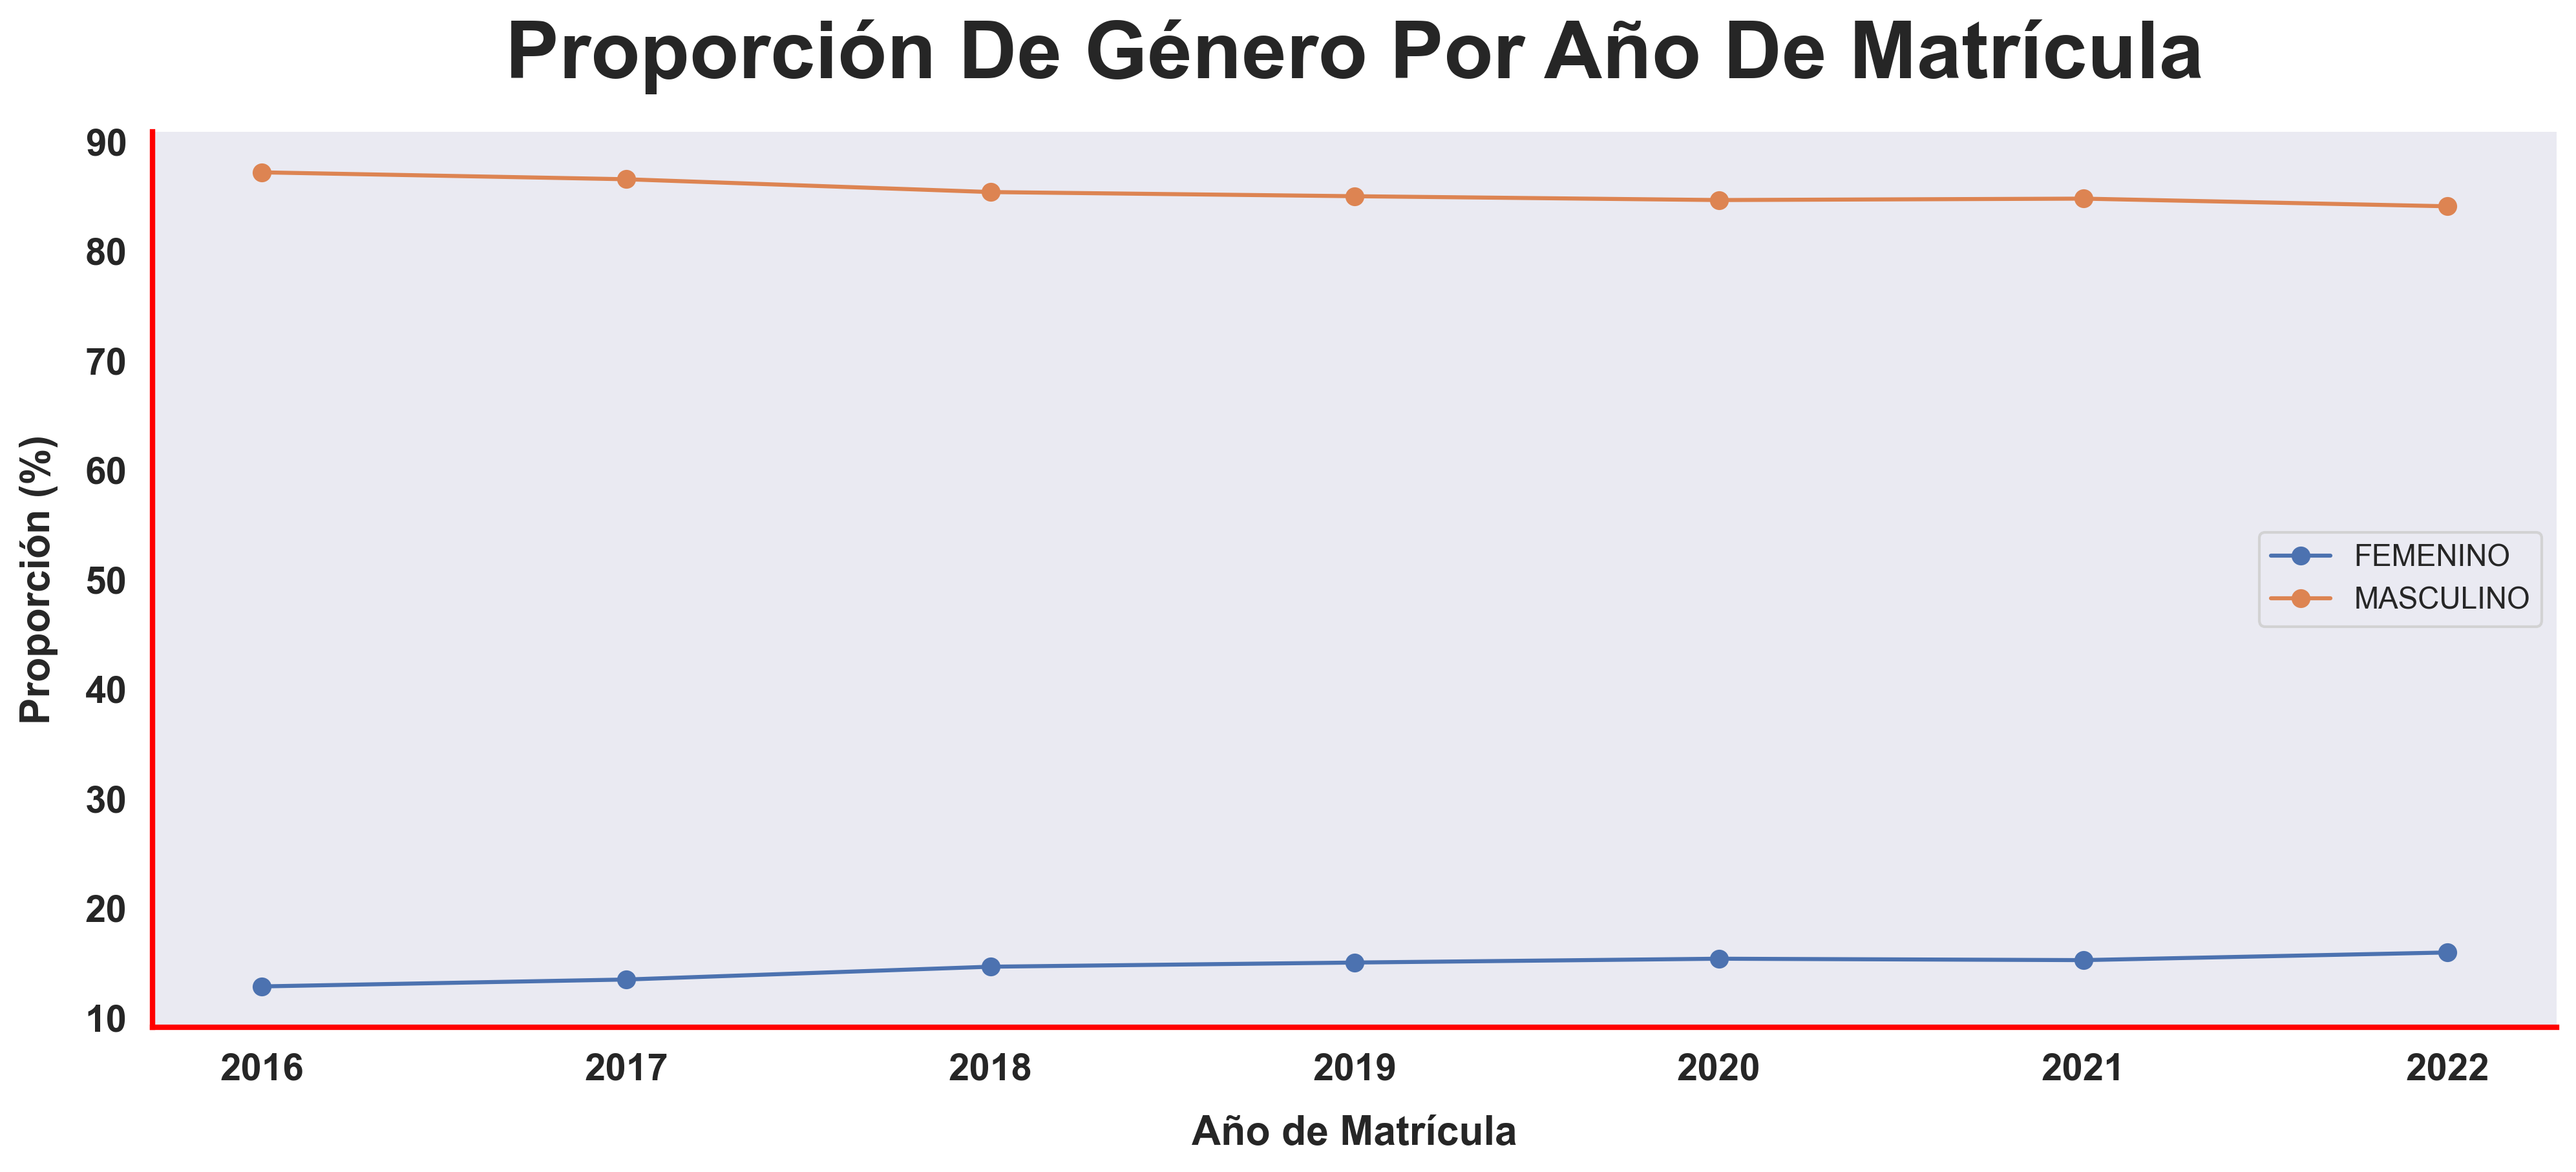

In [58]:
fig, ax = plt.subplots(figsize=(16,6), dpi=300)
proporcion2.plot(kind='line', ax=ax, marker = 'o')
#
ax.grid(False)
#
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('red')
#
sns.despine(top=True)
#
plt.yticks(fontweight='bold', fontsize= 14)
plt.xticks(fontweight='bold', fontsize= 14)
# Configurar etiquetas y leyendas
plt.xlabel('Año de Matrícula', fontweight='bold', fontsize= 15, labelpad=10)
plt.ylabel('Proporción (%)', fontweight='bold', fontsize= 15, labelpad=10)
plt.title('Proporción de Género por Año de Matrícula'.title(), fontsize=30, fontweight='bold', pad=20)
plt.legend(title='Género')
#
plt.legend(loc= 'best')
# Guardar gráfico.
plt.savefig("../img/proporcion_por_año_matricula.jpg", dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

### 6.7 PREGUNTA 7.

> **¿Cuál Es La Nacionalidad Predominante De Los Estudiantes Matriculados?**

In [85]:
nacionalidad_pre = df2.groupby(['Nacionalidad', 'Genero'])['Nacionalidad'].count().unstack()[['MASCULINO', 'FEMENINO']]
nacionalidad_pre2 = df2.groupby(['Nacionalidad', 'Genero'])['Nacionalidad'].count().unstack().drop('Peru')[['MASCULINO', 'FEMENINO']]

In [86]:
nacionalidad_pre

Genero,MASCULINO,FEMENINO
Nacionalidad,,
Alemania,12.0,NaN
Argentina,162.0,28.0
Bolivia,35.0,NaN
Brasil,17.0,NaN
Chile,54.0,4.0
China,NaN,12.0
Colombia,24.0,9.0
Corea Republica,NaN,3.0
España,6.0,7.0


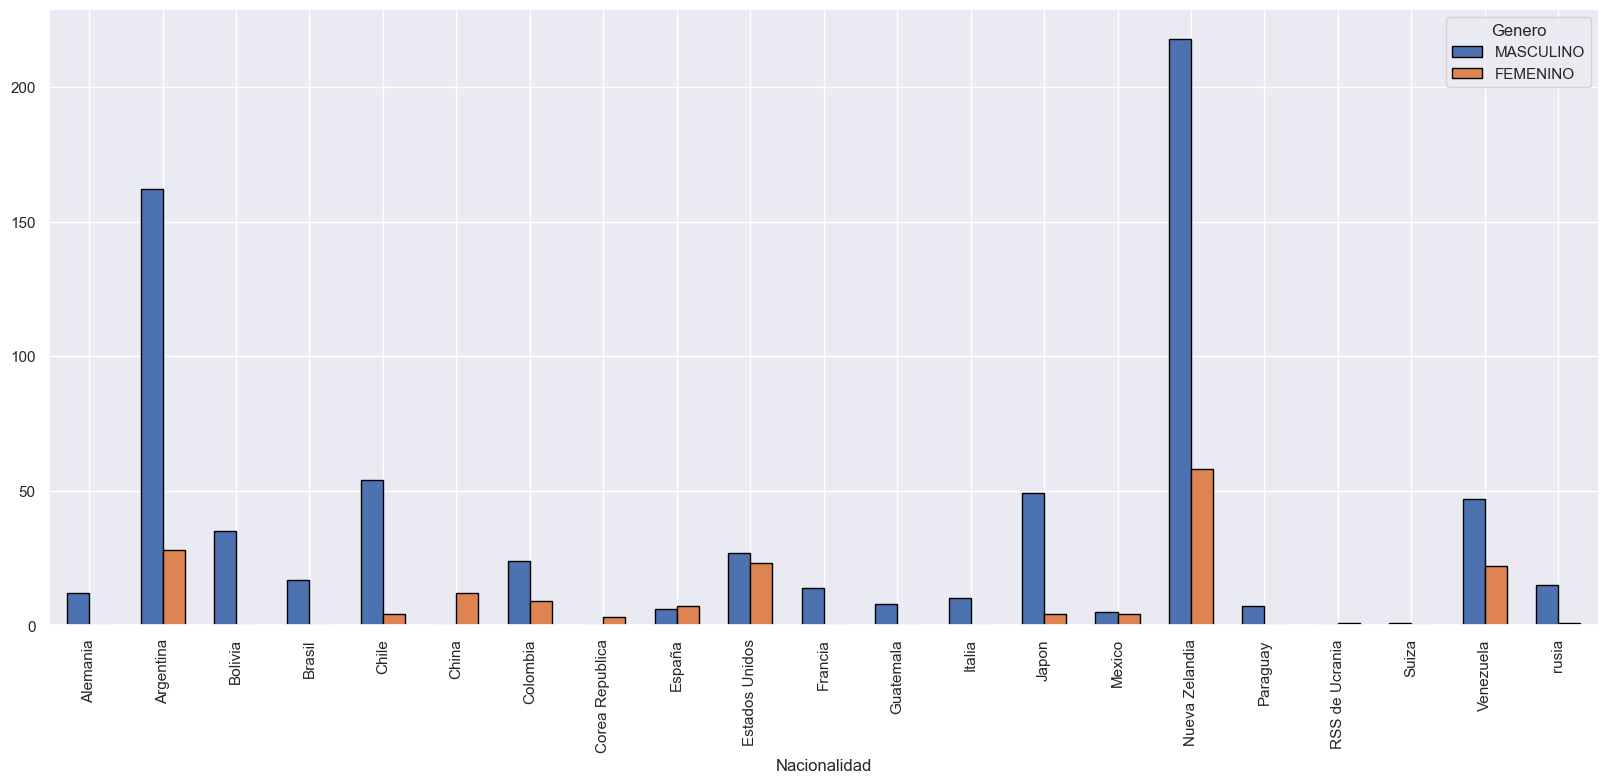

In [87]:
nacionalidad_pre2.plot(kind= 'bar', figsize=(20,8), width=0.6, edgecolor='black')
plt.savefig("../img/nacionalidad_predominante_sin_peru.jpg", dpi=300, bbox_inches='tight')
plt.show()

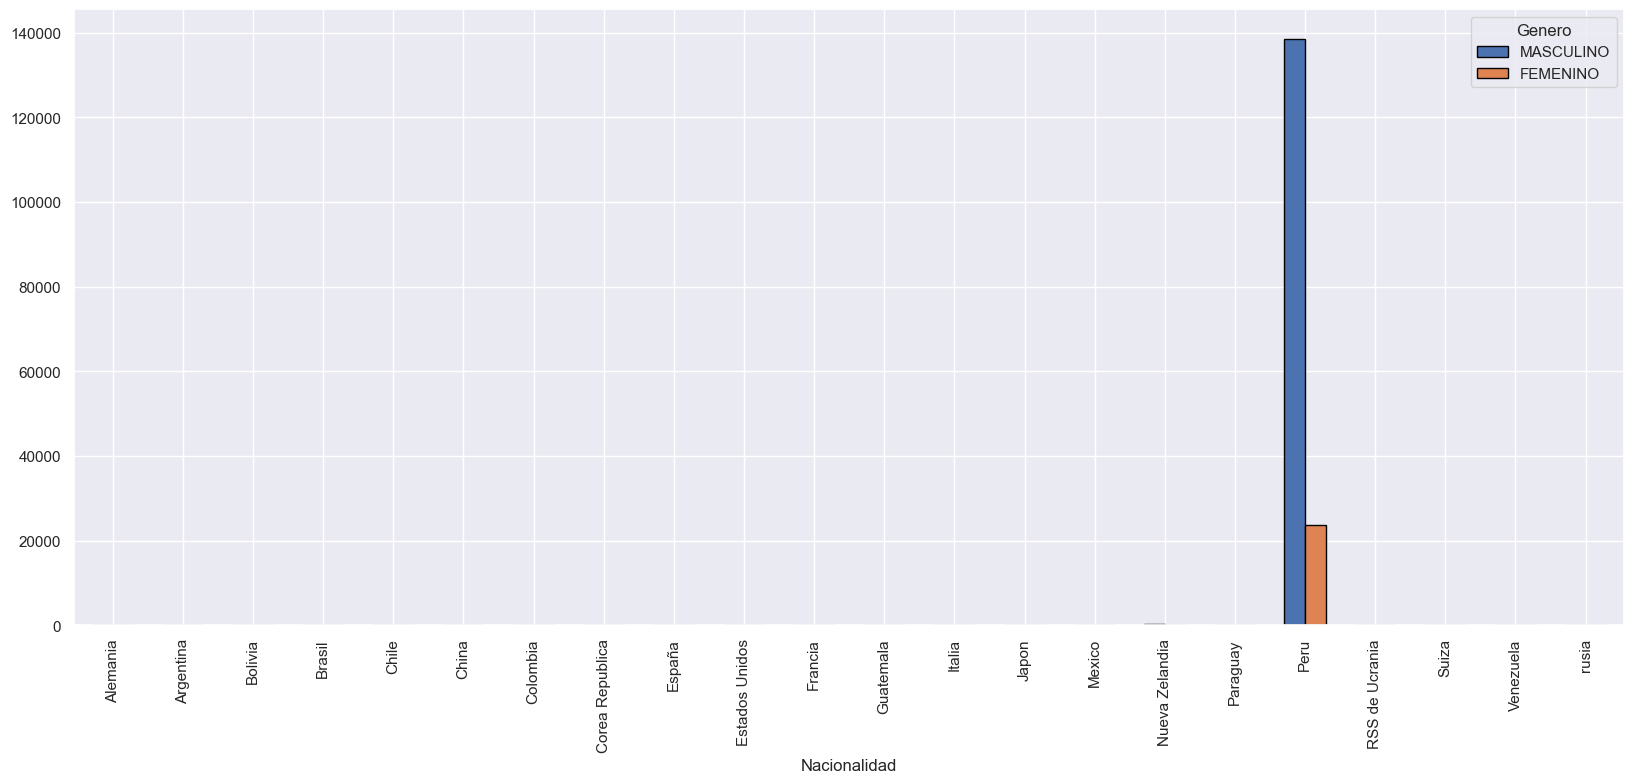

In [88]:
# Solo se ve la barra de Perú debido a que tiene una cantidad de registros significativamente mayor que las demás nacionalidades.
# Podemos verificar esto con el slicing [x:x]
nacionalidad_pre.plot(kind= 'bar', figsize=(20, 8), width= 0.6, edgecolor='black')
plt.savefig("../img/nacionalidad_predominante_con_peru.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [89]:
nacionalidad_pre

Genero,MASCULINO,FEMENINO
Nacionalidad,,
Alemania,12.0,NaN
Argentina,162.0,28.0
Bolivia,35.0,NaN
Brasil,17.0,NaN
Chile,54.0,4.0
China,NaN,12.0
Colombia,24.0,9.0
Corea Republica,NaN,3.0
España,6.0,7.0


### Insights.
- Perú es el país más prodominante a la hora de matriculas por País.
- Luego le sigue Argentina con 190 matriculados y Estados Unidos con 50 matriculados.
- Sorprendentemente los varones siguen siendo más númerosos en la matricula que las mujeres.
- En Estados Unidos esta brecha parece ser mas corta con un porcentaje de 46% de mujeres matriculadas y 54 % varones matriculados.

### 6.8 PREGUNTA 8.

> **¿Cuál Es La Edad Predominante De Los Estudiantes Matriculados?**

In [90]:
edad_pre = df2.groupby(['Edad', 'Genero'])['Edad'].count().unstack()[0:30][['MASCULINO', 'FEMENINO']]
edad_pre

Genero,MASCULINO,FEMENINO
Edad,,
15,NaN,2.0
16,104.0,20.0
17,2283.0,369.0
18,6591.0,1072.0
19,11613.0,2051.0
20,15301.0,2871.0
21,17235.0,3382.0
22,17266.0,3416.0
23,15294.0,3046.0


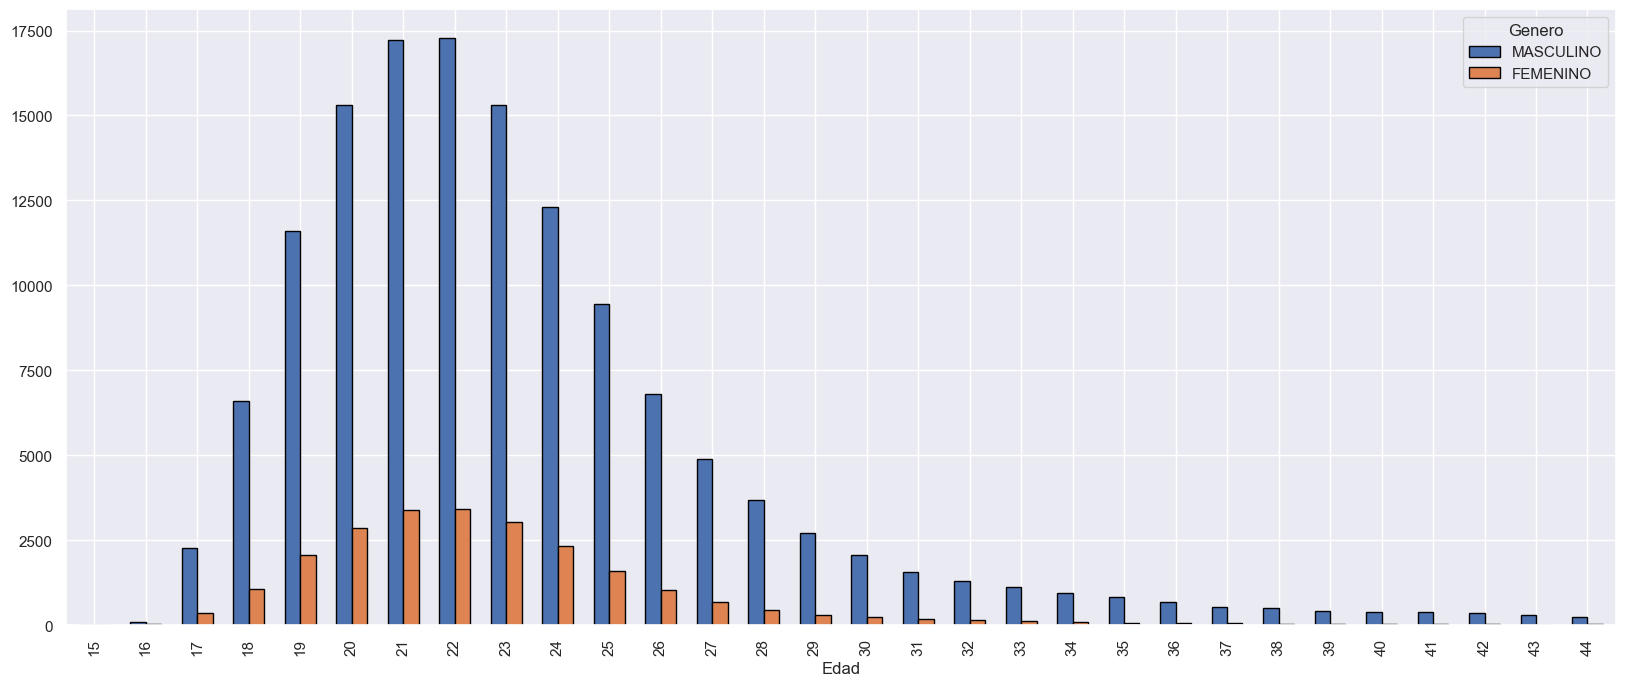

In [91]:
edad_pre[0:30].plot(kind='bar', figsize=(20,8), width=0.6, edgecolor='black')
plt.savefig("../img/edad_predominante.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [99]:
df2['Edad'].median()

22.0

###  Insights.
- El promedio de edad de los matriculados es de 22 años.
- La edad con más matriculados son los de 21 años, siguiendo los de 20, 22 y 23 años.
- La edad con menos matriculados son los de 15 años, siguiendo los de 16, 43 y 44 años.

# 7. CONCLUSIONES Y HALLAZGOS.

### 7.1. RESUMEN DE OBSERVACIONES

> ¿Cuáles Son Las 10 Especialidades Con La Mayor Cantidad De Estudiantes Matriculados?
- En nuestro DataSet se realizaron 163199 matriculas.
- Existen 31 especialidades diferentes.
- Ingeniería Civil es la especialidad con más matriculados.
- Estadística e Ingeniería De Petróleo son las dos especialidades con menos matriculados.
- Del 2016 al 2022 hubo de 21084 matriculados en la especialidaad Ingeniería Civil, representando el 12.92% de todas las matriculas totales.

> ¿Cuál es La Carrera Más Predominante De Los Estudiantes Matriculados Según Su Sexo?
- En todas las especialdades los hombres son los que tienen mayor porcentaje matriculados.
- En la carrera de Arquitectura las mujeres tuvieron más matriculados con respecto a las otras especialidades. Teniendo una participación del 41.63% con respecto al total.

> ¿Cuántos Estudiantes Se Matricularon En Total Cada Año?
- El Año En Que Más Alumnos Se Matricularon Fue En El 2017, Con Un Total De 24152 Alumnos.
- El Año En Que Menos Alumnos Se Matricularon Fue En El 2022, Con Un Total De 22391 Alumnos.
- Si bien cada año hubo un leve descenso en el número de matriculados, siempre se mantuvo por encima de 20000 matriculados por año.

> ¿Cuál es La Carrera Más Predominante De Los Estudiantes Matriculados Por Año y Especialidad?
- Como podemos observar, la especialidad de Ingeniería Civil siempre fue la que tuvo más personas inscritas durante los años del 2016 al 2022.
- Además podemos observar que el año 2016 fue el año en el que la especialidad de Ingeniería Civil alcanzó su pico máximo de matriculados, viendo una disminución leve en los años posteriores.
- La especialidad de Ingeniería De Petróleo solo tuvo un matriculado en el año 2016 siendo su único año en donde tuvo al menos un matriculado, pasando lo mismo con la especialidad de Estadística que solo tuvo un matriculado en el año 2017, cosa que es raro, ya que ambas especialidades son muy demandantes en el Perú. Posiblemente se trate de un error de omisión en los datos.

> ¿Cuál Fue La Distribución De La Matrícula De Estudiantes Por Género A Lo Largo De Los Años?
- Los varones tienen más matriculas al año que las mujeres.
- Del año 2016 al 2022 hubieron 23865 mujeres matriculadas.
- Del año 2016 al 2022 hubieron 139334 varones matriculados.
- Del 100% de los datos los varones abarcan el 85.4% y las mujeres solo el 14.6%.

> ¿Cuál Es La Nacionalidad Predominante De Los Estudiantes Matriculados?
- Perú es el país más prodominante a la hora de matriculas por País.
- Luego le sigue Argentina con 190 matriculados y Estados Unidos con 50 matriculados.
- Sorprendentemente los varones siguen siendo más númerosos en la matricula que las mujeres.
- En Estados Unidos esta brecha parece ser mas corta con un porcentaje de 46% de mujeres matriculadas y 54 % varones matriculados.

> ¿Cuál Es La Edad Predominante De Los Estudiantes Matriculados?
- El promedio de edad de los matriculados es de 22 años.
- La edad con más matriculados son los de 21 años, siguiendo los de 20, 22 y 23 años.
- La edad con menos matriculados son los de 15 años, siguiendo los de 16, 43 y 44 años.